<a href="https://colab.research.google.com/github/fzehrauslu/ArtificaNeuralNetworkExamples/blob/master/anRNNexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

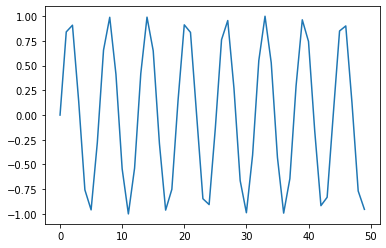

In [1]:
import tensorflow.python.keras  as keras
from tensorflow.python.keras import Sequential

# generate dataset, which is generated with a sinus functions.
import math
import numpy as np
import matplotlib.pyplot as plt

sin_wave = np.array([math.sin(x) for x in np.arange(200)])
plt.plot(sin_wave[:50])

Generate sequential data, which has 50 elements at each sequence array. We will predict the next element by feeding the RNN with a sequence array of 50 elements

In [2]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

## num_records is the possible number of sequence arrays we can generate
## Use (num_records - 50) of them for training
## and the rest of it, (50), for validation

# generate sequences for training data
for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

#Print the shape of the data:
print(X.shape, Y.shape)

(100, 50, 1) (100, 1)


In [0]:
## generate validation dataset
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

In [0]:
#building a simple RNN model
def modelbuild():
    model = Sequential()
    model.add(keras.layers.InputLayer(input_shape=(50,1)))
    model.add(keras.layers.recurrent.SimpleRNN(units = 100, activation='sigmoid',
    use_bias=True))
    model.add(keras.layers.Dense(units=1, input_dim=100,activation=None))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [5]:
finalmodel = modelbuild()
finalmodel.fit(X,Y, epochs=25, batch_size=1,validation_data=(X_val,Y_val))

Epoch 1/25
100/100 [==============================] - 1s 9ms/step - loss: 0.5434 - val_loss: 0.5002
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 0.4009 - val_loss: 0.4105
Epoch 3/25
100/100 [==============================] - 1s 8ms/step - loss: 0.3373 - val_loss: 0.2667
Epoch 4/25
100/100 [==============================] - 1s 8ms/step - loss: 0.2531 - val_loss: 0.3108
Epoch 5/25
100/100 [==============================] - 1s 8ms/step - loss: 0.1783 - val_loss: 0.0917
Epoch 6/25
100/100 [==============================] - 1s 8ms/step - loss: 0.0492 - val_loss: 0.0171
Epoch 7/25
100/100 [==============================] - 1s 8ms/step - loss: 0.0046 - val_loss: 4.4796e-04
Epoch 8/25
100/100 [==============================] - 1s 8ms/step - loss: 1.0342e-04 - val_loss: 6.5744e-05
Epoch 9/25
100/100 [==============================] - 1s 8ms/step - loss: 1.0069e-04 - val_loss: 6.0601e-05
Epoch 10/25
100/100 [==============================] - 1s 8ms/step - loss: 7.498

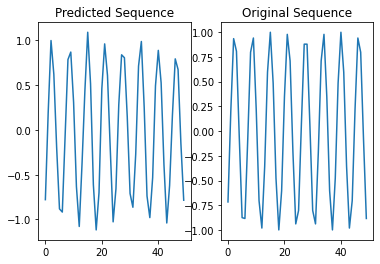

In [6]:
## Add normal distributed noise to validation data and predict the sequence
preds = finalmodel.predict(X_val+0.1*np.random.randn(X_val.shape[0],X_val.shape[1],X_val.shape[2])) #X_val,Y_val
plt.subplot(121)
plt.plot(preds)
plt.title('Predicted Sequence')
plt.subplot(122)
plt.plot(Y_val)
plt.title('Original Sequence')
plt.show()